## Homework 7

## <em> Bootstrapping, Bayesian Evidence</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>


***

### Imports

In [1]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='ticks')

In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
# general plot params
params = {
          'axes.labelsize' : 24,
          'xtick.labelsize' : 16,
          'ytick.labelsize' : 16,
          'figure.figsize'  : (14,7),
         }
plt.rcParams.update(params)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
localpath='/Users/elizabeth/Library/CloudStorage/GoogleDrive-elizabeth.donoway@gmail.com/.shortcut-targets-by-id/1N7VNzEhLpxeYFHjRpWdzVH2k_ZEUEjV6/P188_288/P188_288_HW7/'
colabpath='/content/drive/My Drive/P188_288/P188_288_HW7/'

### Mounting Google Drive locally
Mount your Google Drive on your runtime using an authorization code.

Note: When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

***

#### Problem 1 - Bootstrapping Supernova Data

In this homework, we use a compilation of supernovae data to show that the expansion of the universe is accelerating, and hence it contains dark energy. This is the Nobel prize winning research in 2011 (https://www.nobelprize.org/nobel_prizes/physics/laureates/2011/), and Saul Perlmutter, a professor of physics at Berkeley, shared a prize in 2011 for this discovery.
<br><br>
"The expansion history of the universe can be determined quite easily, using as a “standard candle” any distinguishable class of astronomical objects of known intrinsic brightness that can be identified over a wide distance range. As the light from such beacons travels to Earth through an expanding universe, the cosmic expansion stretches not only the distances between galaxy clusters, but also the very wavelengths of the photons en route. By the time the light reaches us, the spectral wavelength $\lambda$ has thus been redshifted by precisely the same incremental factor $z = \Delta \lambda/\lambda$ by which the cosmos has been stretched in the time interval since the light left its source. The recorded redshift and brightness of each such object thus provide a measurement of the total integrated expansion of the universe since the time the light was emitted. A collection of such measurements, over a sufficient range of distances, would yield an entire historical record of the universe’s expansion." (Saul Perlmutter, http://supernova.lbl.gov/PhysicsTodayArticle.pdf).
<br><br>
Supernovae emerge as extremely promising candidates for measuring the cosmic expansion. Type I Supernovae arises from the collapse of white dwarf stars when the Chandrasekhar limit is reached. Such nuclear chain reaction occurs in the same way and at the same mass, the brightness of these supernovae are always the same. The relationship between the apparent brightness and distance of supernovae depend on the contents and curvature of the universe.
<br><br>
We can infer the "luminosity distance" $D_L$ from measuring the inferred brightness of a supernova of luminosity $L$. Assuming a naive Euclidean approach, if the supernova is observed to have flux $F$, then the area over which the flux is distributed is a sphere radius $D_L$, and hence <br><br>
$$F = \frac{L}{4\pi D_L^2}.$$
<br>
In Big Bang cosmology, $D_L$ is given by:
<br><br>
$$ D_L = \frac{\chi(a)}{a} $$
<br>
where $a$ is the scale factor ($\frac{\lambda_0}{\lambda} = 1 + z = \frac{a_0}{a}$, and the quantity with the subscript 0 means the value at present. Note that $a_0 = 1, z_0 = 0$.), and $\chi$ is the comoving distance, the distance between two objects as would be measured instantaneously today. For a photon, $cdt = a(t)d\chi$, so $\chi(t) = c\int_t^{t_0} \frac{dt'}{a(t')}$. We can write this in terms of a Hubble factor ($H(t) = \frac{1}{a}\frac{da}{dt}$), which tells you the expansion rate: $\chi(a) = c\int_a^1 \frac{da'}{a'^2H(a')} = c\int_0^z \frac{dz'}{H(z')}$. (change of variable using $a = \frac{1}{1+z}$.)
<br><br>
Using the Friedmann equation (which basically solves Einstein's equations for a homogenous and isotropic universe), we can write $H^2$ in terms of the mass density $\rho$ of the components in the universe: $H^2(z) = H_0^2[\Omega_m(1+z)^3 + (1-\Omega_m)(1+z)^2].$ <br><br>
$\Omega$ is the density parameter; it is the ratio of the observed density of matter and energy in the universe ($\rho$) to the critical density $\rho_c$ at which the universe would halt is expansion. So $\Omega_0$ (again, the subscript 0 means the value at the present) is the total mass and energy density of the universe today, and consequently $\Omega_0 = \Omega_{m}$ (matter density parameter today; remember we obtained the best-fit value of this parameter in Project 1?) = $\Omega_{\mathrm{baryonoic\ matter}}$ + $\Omega_{\mathrm{dark\ matter}}$. If $\Omega_0 < 1$, the universe will continue to expand forever. If $\Omega_0 > 1$, the expansion will stop eventually and the universe will start to recollapse. If $\Omega_0 = 1$, then the universe is flat and contains enough matter to halt the expansion but not enough to recollapse it. So it will continue expanding, but gradually slowing down all the time, finally running out of steam only in the infinite future. Even including dark matter in this calculation, cosmologists found that all the matters in the universe only amounts to about a quarter of the required critical mass, suggesting a continuously expanding universe with deceleration. Then, using all this, we can write the luminosity distance in terms of the density parameters: <br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.
<br><br>
Fluxes can be expressed in magnitudes $m$, where $m = -2.5\cdot\mathrm{log}_{10}F$ + const. The distance modulus is $\mu = m - M$ ($M$ is the absolute magnitude, the value of $m$ if the supernova is at a distance 10pc. Then, we have:
<br><br>
$$ \mu = 25 + 5\cdot \mathrm{log}_{10}\Big(D_L\ [in\ the\ unit\ of \ Mpc]\Big)$$
<br><br>
In this assignment, we use the SCP Union2.1 Supernova (SN) Ia compilation. (http://supernova.lbl.gov/union/)
<br><br>
First, load the measured data: $z$ (redshift), $\mu$ (distance modulus), $\sigma(\mu)$ (error on distance modulus)


In [150]:
# data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW8/sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
data = np.loadtxt(localpath+"sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

With measurements of the distance modulus $\mu$, we used Bayesian analysis to estimate the cosmological parameters $w$ and $\Omega_m$.
<br><br>
Let us assume that the universe is flat (which is a fair assumption since the CMB measurements indicate that the universe has no large-scale curvature). $\Omega_0 = \Omega_m + \Omega_{DE} = 1$. Then, we do not need to worry about the curvature term:<br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}\ [unit\ of\ Mpc] $$<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.<br><br>
Assuming that errors are Gaussian (can be justified by averaging over large numbers of SN; central limit theorem), we calculate the likelihood $L$ as: <br><br>
$$ L \propto \mathrm{exp}\Big( -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} \Big) $$
<br>
where $z_i, \mu_i, \sigma(\mu_i)$ are from the measurements, and we compute $\mu_{model}$ as a function of $z, \Omega_m, w$.

***

New Material:

In this problem, assume that the universe is flat, and our two parameters are $w$ and $\Omega_m$. We are going to estimate 1-D posteriors for each of these using the bootstrapping technique.

As a simple first example of bootstrapping, let's apply bootstrapping to the process of obtaining an average of some data. Suppose that we have 10 measurements of $x$: [3.7, 3.2, 3.3, 3.1, 3.2, 3.5, 2.9, 3.4, 3.0, 3.1]. We can randomly generate 5 samples of 10 data measurements using bootstrapping by randomly sampling with replacement:

In [151]:
x = np.array([3.7, 3.2, 3.3, 3.1, 3.2, 3.5, 2.9, 3.4, 3.0, 3.1])

num_samples = 5
len_x = len(x)
idx = np.random.randint(0, len_x, (num_samples, len_x))
print("After bootstrap re-sampling, here are 5 sets of 10 measurements:")
print(x[idx])

After bootstrap re-sampling, here are 5 sets of 10 measurements:
[[3.4 3.1 3.  3.2 3.3 3.1 3.  3.5 3.4 3. ]
 [3.7 3.5 3.1 2.9 3.4 3.2 3.1 3.2 3.3 3.1]
 [3.1 3.1 3.1 2.9 3.2 3.1 3.  3.3 3.2 3.3]
 [3.2 3.4 3.7 3.3 2.9 3.1 3.5 3.5 3.  3.5]
 [3.2 3.2 3.2 3.2 3.3 3.2 3.2 3.1 2.9 3.2]]


Now if we take the average of each one of these sets of 10 data points, we get 5 draws from the posterior of $\bar{x}$, as the average would be the MAP value of the average value given that data set.
<br><br>
<span style="color:blue"> <i> 1. Generate 1000 samples using bootstrapping and compute the MAP values of $\bar{x}$ for each of them. Plot the histogram of these values to obtain a 1-D posterior of $\bar{x}$. </i></span><br>

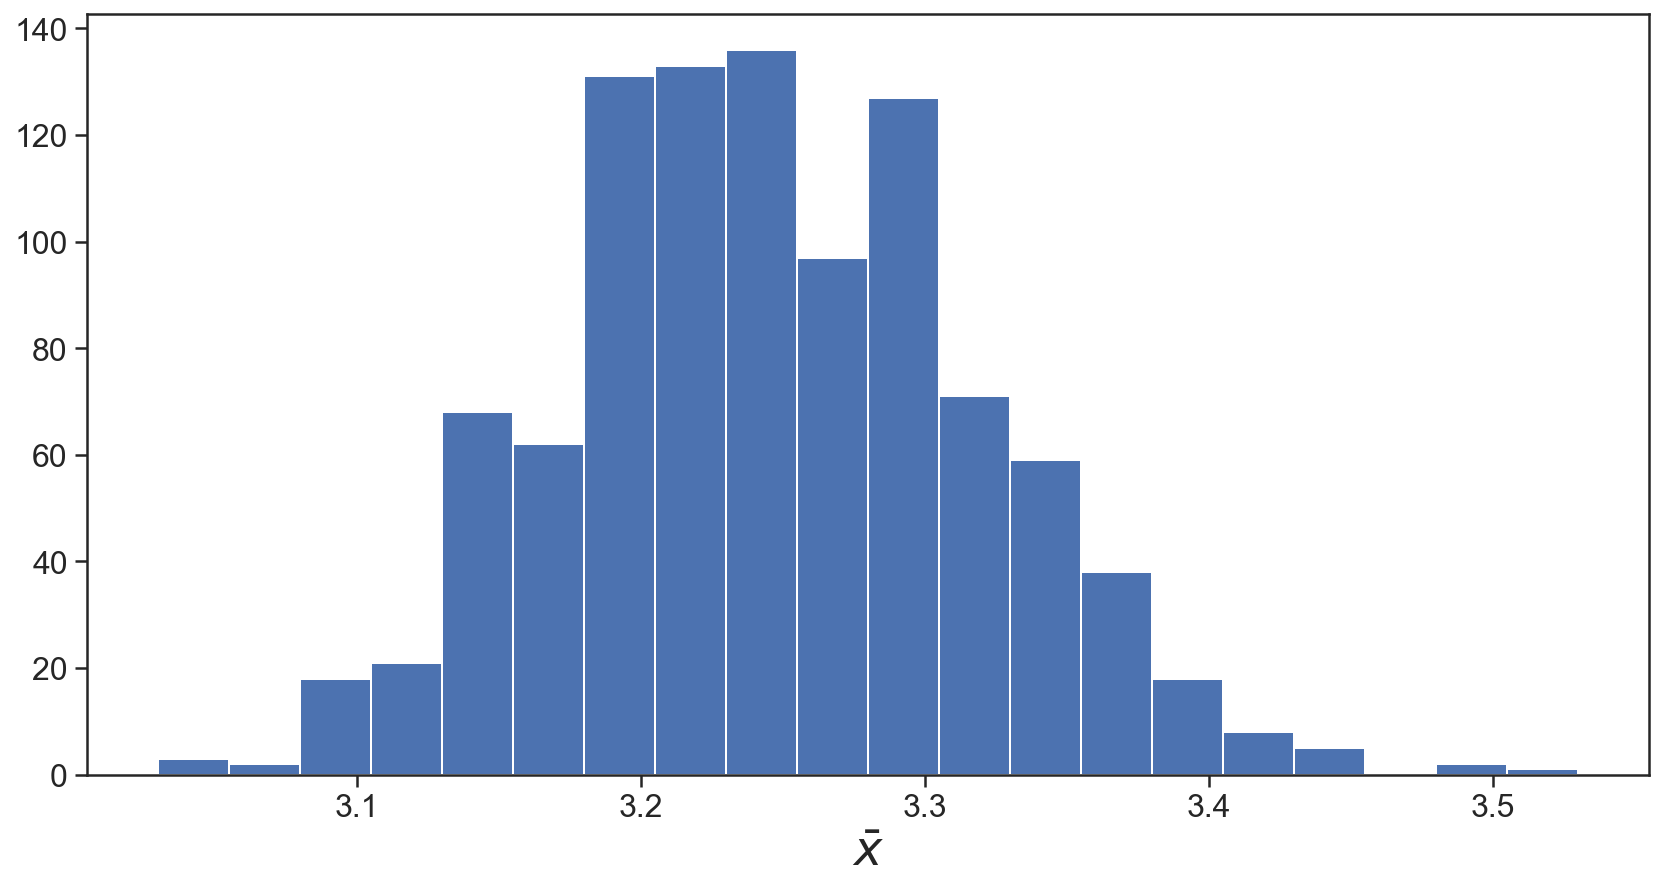

In [153]:
num_samples = 1000
idx = np.random.randint(0, len_x, (num_samples, len_x))
x_hat = np.mean(np.array(x[idx]), axis=1)
plt.hist(x_hat,bins=20)
plt.xlabel(r'$\bar{x}$')
plt.show()

<span style="color:blue"> <i> 2. Now, use the bootstrap resampling technique to estimate the posteriors of $\Omega_m$ and $w$. Take 200 bootstrap samples of supernova distance modulus measurements and their corresponding redshifts by randomly sampling from the given data. Now, think about how you can obtain the 1-d posteriors of $\Omega_m$ and $w$, using maximum likelihood estimation. (Hint: you might want to try using scipy.optimize.fmin https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html, this may take ~10 mins or more, you might want to report progress while looping through these 200 samples) Plot the 1-d posteriors (as histograms).</i></span><br>

In [156]:
def D_l(z_list, omega_m, w, h=0.7):
    integrand = lambda x: 1/np.sqrt(omega_m*(1+x)**3 + (1-omega_m)*(1+x)**(3*(1+w)))
    integral = np.array([quad(integrand, 0, z)[0] for z in z_list])
    return 2997.92458*(1+z_list)*integral/h

def mu(z, omega_m, w, h=0.7):
    return 25 + 5*np.log10(D_l(z, omega_m, w, h=0.7))

def chi_sq(mu_data, mu_model, mu_err):
    return np.sum(((mu_data - mu_model)/mu_err)**2)

def minus_log_likelihood(param, idxs):
    Omegam, w = param
    if(Omegam<=0 or w>=0):
        lnL = -1.0e100
    else:
        lnL = -0.5*chi_sq(mu_data[idxs], mu(z_data[idxs], Omegam, w), mu_err_data[idxs])
    return -lnL

In [178]:
from scipy.optimize import fmin

num_samples = 200
idx = np.random.randint(0, len(z_data), (num_samples, len(z_data)))
param = [0,0]
post_fits = np.empty((num_samples, 2))
for i, index_list in enumerate(idx):
    Omegam, w = fmin(minus_log_likelihood, x0=param, args=(index_list,))
    post_fits[i] = [Omegam, w]
    print('Iteration ', i, ': Omega_m = ', Omegam, ', w = ', w)

Optimization terminated successfully.
         Current function value: 292.428372
         Iterations: 65
         Function evaluations: 126
Iteration  0 : Omega_m =  0.22631376795942418 , w =  -0.9068646643893349
Optimization terminated successfully.
         Current function value: 265.161655
         Iterations: 71
         Function evaluations: 137
Iteration  1 : Omega_m =  0.31341019413827176 , w =  -1.0650389161839442
Optimization terminated successfully.
         Current function value: 280.164679
         Iterations: 65
         Function evaluations: 124
Iteration  2 : Omega_m =  0.31138096698494383 , w =  -1.0513400852658292
Optimization terminated successfully.
         Current function value: 271.693099
         Iterations: 58
         Function evaluations: 113
Iteration  3 : Omega_m =  0.24606961347176504 , w =  -0.9811079804499014
Optimization terminated successfully.
         Current function value: 292.287729
         Iterations: 73
         Function evaluations: 141
Ite

Optimization terminated successfully.
         Current function value: 313.553345
         Iterations: 79
         Function evaluations: 153
Iteration  39 : Omega_m =  0.4089798382862969 , w =  -1.3885617930345304
Optimization terminated successfully.
         Current function value: 292.250246
         Iterations: 71
         Function evaluations: 135
Iteration  40 : Omega_m =  0.32104874412959783 , w =  -1.114767220195891
Optimization terminated successfully.
         Current function value: 268.702100
         Iterations: 53
         Function evaluations: 104
Iteration  41 : Omega_m =  0.16426732688424275 , w =  -0.7998356181629904
Optimization terminated successfully.
         Current function value: 316.111081
         Iterations: 64
         Function evaluations: 127
Iteration  42 : Omega_m =  0.28505459537048905 , w =  -1.0192422909098464
Optimization terminated successfully.
         Current function value: 283.579414
         Iterations: 58
         Function evaluations: 112
I

Optimization terminated successfully.
         Current function value: 283.135193
         Iterations: 69
         Function evaluations: 133
Iteration  78 : Omega_m =  0.23690828889194668 , w =  -0.8995985080177162
Optimization terminated successfully.
         Current function value: 260.894589
         Iterations: 68
         Function evaluations: 131
Iteration  79 : Omega_m =  0.29347233506651005 , w =  -1.02884947814182
Optimization terminated successfully.
         Current function value: 286.832294
         Iterations: 66
         Function evaluations: 125
Iteration  80 : Omega_m =  0.30523870717986956 , w =  -1.1055050748907147
Optimization terminated successfully.
         Current function value: 261.151071
         Iterations: 57
         Function evaluations: 110
Iteration  81 : Omega_m =  0.21675522991003132 , w =  -0.8681898037537279
Optimization terminated successfully.
         Current function value: 276.599827
         Iterations: 72
         Function evaluations: 137
I

Optimization terminated successfully.
         Current function value: 295.233488
         Iterations: 53
         Function evaluations: 102
Iteration  117 : Omega_m =  0.1321726765607285 , w =  -0.7559983100245342
Optimization terminated successfully.
         Current function value: 258.581095
         Iterations: 72
         Function evaluations: 138
Iteration  118 : Omega_m =  0.31063852808955583 , w =  -1.1184671474952714
Optimization terminated successfully.
         Current function value: 271.590717
         Iterations: 78
         Function evaluations: 147
Iteration  119 : Omega_m =  0.3993819112671788 , w =  -1.429576300132978
Optimization terminated successfully.
         Current function value: 271.786407
         Iterations: 76
         Function evaluations: 142
Iteration  120 : Omega_m =  0.31928649082853977 , w =  -1.0651875550926724
Optimization terminated successfully.
         Current function value: 267.782380
         Iterations: 75
         Function evaluations: 14

Optimization terminated successfully.
         Current function value: 296.064632
         Iterations: 57
         Function evaluations: 109
Iteration  156 : Omega_m =  0.15212048375397874 , w =  -0.7837633666640045
Optimization terminated successfully.
         Current function value: 333.924134
         Iterations: 68
         Function evaluations: 129
Iteration  157 : Omega_m =  0.35777280771514297 , w =  -1.1990811546618194
Optimization terminated successfully.
         Current function value: 271.888266
         Iterations: 62
         Function evaluations: 115
Iteration  158 : Omega_m =  0.027522515749026644 , w =  -0.6384648739856713
Optimization terminated successfully.
         Current function value: 278.195100
         Iterations: 65
         Function evaluations: 125
Iteration  159 : Omega_m =  0.27718173981698047 , w =  -1.0364785338815854
Optimization terminated successfully.
         Current function value: 237.459302
         Iterations: 79
         Function evaluations

Optimization terminated successfully.
         Current function value: 266.701694
         Iterations: 71
         Function evaluations: 135
Iteration  195 : Omega_m =  0.3205725982276705 , w =  -1.0679942072253796
Optimization terminated successfully.
         Current function value: 318.937927
         Iterations: 67
         Function evaluations: 129
Iteration  196 : Omega_m =  0.29794701007092944 , w =  -1.045012968372777
Optimization terminated successfully.
         Current function value: 272.586509
         Iterations: 61
         Function evaluations: 117
Iteration  197 : Omega_m =  0.24623916778992364 , w =  -1.0105374461496848
Optimization terminated successfully.
         Current function value: 304.167761
         Iterations: 62
         Function evaluations: 119
Iteration  198 : Omega_m =  0.23939483649084625 , w =  -0.9075042393560763
Optimization terminated successfully.
         Current function value: 277.986644
         Iterations: 56
         Function evaluations: 1

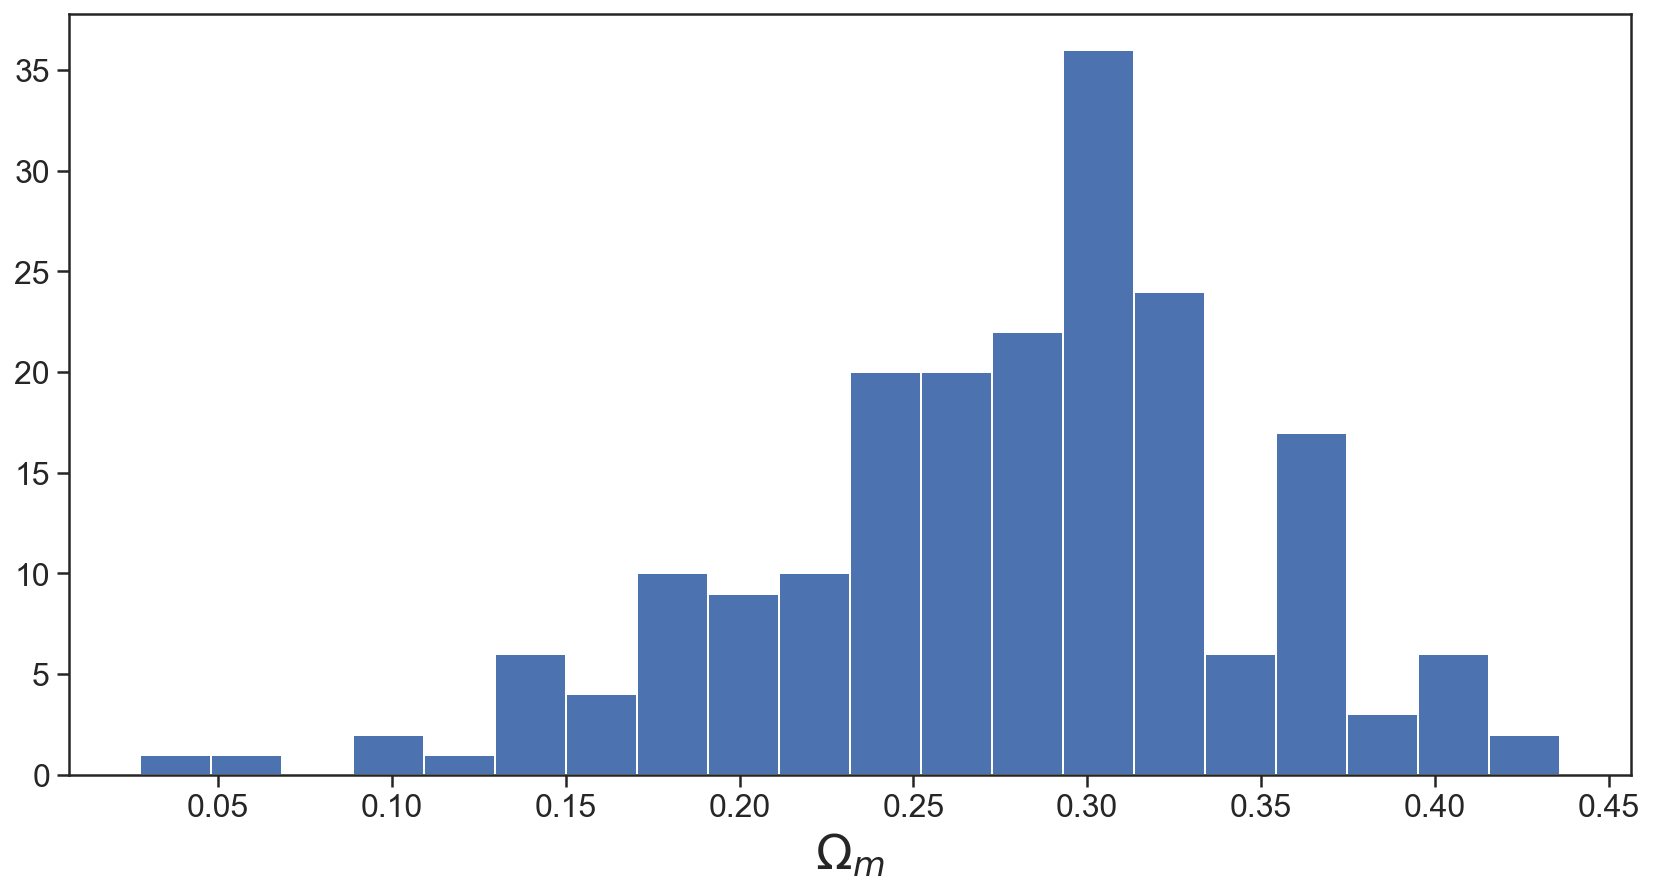

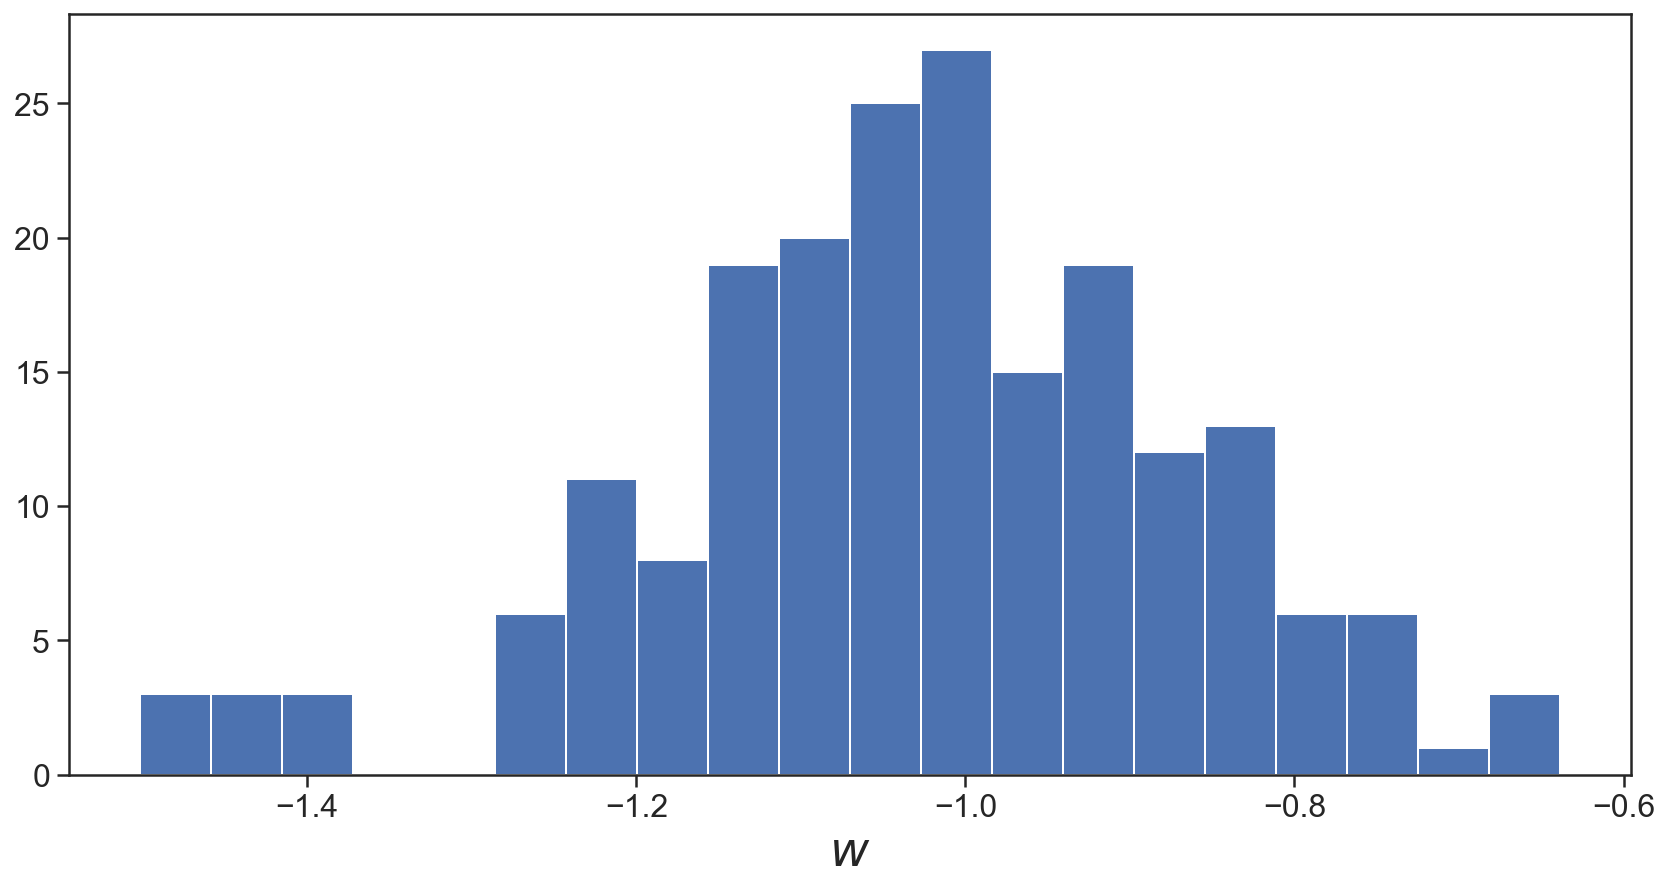

Omega_m =  0.2770508142400623 +/- 0.07096333453780469
w =  -1.0254028843827276 +/- 0.1611697718304381


In [179]:
plt.hist(post_fits[:,0], bins=20)
plt.xlabel(r'$\Omega_m$')
plt.show()

plt.hist(post_fits[:,1], bins=20)
plt.xlabel(r'$w$')
plt.show()

# Print best-fit values and constraints
print ('Omega_m = ', np.mean(post_fits[:,0]) , '+/-' , np.std(post_fits[:,0]))
print ('w = ', np.mean(post_fits[:,1]) , '+/-' , np.std(post_fits[:,1]))

***

#### Problem 2. Bayesian Evidence

The Bayesian evidence for hypothesis $H$, given data $x$ and a model with parameters $z$, is given by

$$p(x| H) = \int dz ~p(x|z,H) p(z|H), $$

where $p(x|z,H)$ is the likelihood and $p(z|H)$ the prior. For a likelihood with a single mode located at $z=\mu$, one can approximate the evidence using the Laplace approximation to give

$$p(x| H) \approx (2 \pi)^{M/2} \sqrt{\det \Sigma} p(x|\mu,H) p(\mu|H) ,$$

where $M$ is the dimensionality of the parameters, and $\Sigma$ is the covariance matrix. If there is no correlation between parameters then the determinant of the covariance matrix is given by the product of the square of the errors of each parameter

$$ \det \Sigma = \prod_{i=1}^M \sigma_i^2 .$$

For simplicity, we assume no correlation in this assignment.

To gain intuition for this equation one can define the prior volume as $V_{\rm prior} = 1/p(\mu|H)$ and the posterior volume as $V_{\rm posterior} = (2 \pi)^{M/2} \sqrt{{\rm det} \Sigma}$. Thus the evidence can be written as 

$$p(x| H) \approx p(x|\mu,H) \frac{V_{\rm posterior}}{V_{\rm prior}} .$$


Hence the Bayesian evidence is approximatey equal to the maximum likelihood multiplied by the posterior-to-prior volume ratio. Becuase the posterior volume is typically narrower than the prior, the evidence will be less than the likelihood. The posteriror-to-prior volume ratio acts as a penalty on the likelihood to account for model complexity. In cases where the prior volume is much larger than the posterior volume, a large penalty will be induced.

For a hypothesis test, Bayes factor is used to compare the Bayesian evidence ratio of two hypotheses. Often one is interested in comparing some hypothesis $H$ to a null hypothesis $H_0$. In such a case Bayes factor is defined as

$$ B \equiv \frac{p(x|H)}{p(x|H_0)} \approx \frac{ p(x|\mu,H)}{p(x|H_0)} \frac{V_{\rm posterior}}{V_{\rm prior}},$$

where in the final step we have applied the Laplace approximation. It can be seen that the Bayes factor is equal to the likelihood ratio multiplied by the posteriror-to-prior volume ratio.

In this excercise we will apply Bayesian evidence in the presence of the look-elsewhere effect, which occurs when the prior volume is much larger than the posterior volume. One of the great powers of the Bayesian approach is that it has a built in correction for the look-elsewhere effect and other forms of model complexity thanks to the posterior-to-prior volume ratio.


#### The look-elsewhere effect

A common problem in statistical analysis is to find evidence for
a physical signal
in a large, continuous parameter space, where the true position of the signal is not known a priori. 
By searching over a wide 
parameter 
space one increases the probability of finding large signals caused by random statistical fluctuations, as opposed to a physical source. This is known as the look-elsewhere effect -- or sometimes the "problem of multiple comparisons" in discrete cases -- 
and must be accounted for when performing a hypothesis test. Ignoring this effect would lead to an overestimation of the statistical significance, sometimes by a considerable amount, and thus incorrectly concluding the detection of a physical signal. 

The look-elsewhere effect is prominent throughout particle physics and cosmology.  One of the most commonly known occurrences is in collider searches for new particles, for example it was a key consideration in the Higgs boson discovery.  In this example, one searches a large range of masses for a resonance, without a priori knowledge of the true mass of the particle.  Similarly, in astrophysical searches for particles one seeks resonances in the energy flux of various astrophysical spectra, where the true energy signature of the particle is unknown.  Examples include:  constraining the dark matter self-annihilation cross-section via gamma ray emission from galaxy clusters, searching for WIMPs via charged cosmic rays, searching for non-baryonic dark matter via X-ray emission from the Milky Way, and explaining the source of high energy astrophysical neutrinos.  In terms of cosmology, the look-elsewhere effect occurs in searches for gravitational wave signals from black hole or neutron star mergers.  Here one searches large time series for a signal, where the time and shape of the event are unknown.  A further cosmological example is searching for signatures of inflation in the primordial power spectrum. The look-elsewhere effect is also prevalent in other areas of physics and beyond, for example:  in astronomy it occurs when detecting exoplanets via stellar photometry, where the period and phase of  the  planets’  transits  are  unknown;  in  biology  it  occurs  when  considering  large  DNA sequences to study genetic association; and in medicine it occurs when testing the effectiveness of drugs in clinical trials.

#### Cosmological Inflation Example

We consider a search to find a signal for non-gaussianities in the primordial power spectrum using Planck data. A specific type of such a model adds the following oscillatory perturbation to the $\Lambda$CDM power spectrum,

$$ P(k) = P_0(k) [1 + A \sin(2 \omega k + \phi)], $$

where $P_0(k)$ is the featureless ($\Lambda$CDM) power spectrum and $A$, $\omega$, and $\phi$ are the amplitude, frequency, and phase of the oscillatory perturbation. Specifically we search for a signal with frequency between 0 and 4,000, and phase between 0 and $2 \pi$. We assume the signal is equally likely to apppear anywhere in paramerter space a priori. In this context the null hpothesis $H_0$ corresponds to $A=0$, i.e. no signal, while the alternative hypothesis $H$ corresponds to $A>0$.

In a full analysis one would fit for all 3 parameters, but, for the sake of simplicity, we will assume that the maximization over amplitude and phase has already been performed. We thus focus on $\omega$, which contributes most to the look-elsewhere effect.

First, load the data and plot the likelihood ratio $L/L_0 \equiv { p(x|z,H)}/{p(x|H_0)} $ as a function of frequency $\omega$. Note the likelihood is already evaluated at the best fit value of $A$ and $\phi$.

Text(0, 0.5, '$\\log L/L_0$')

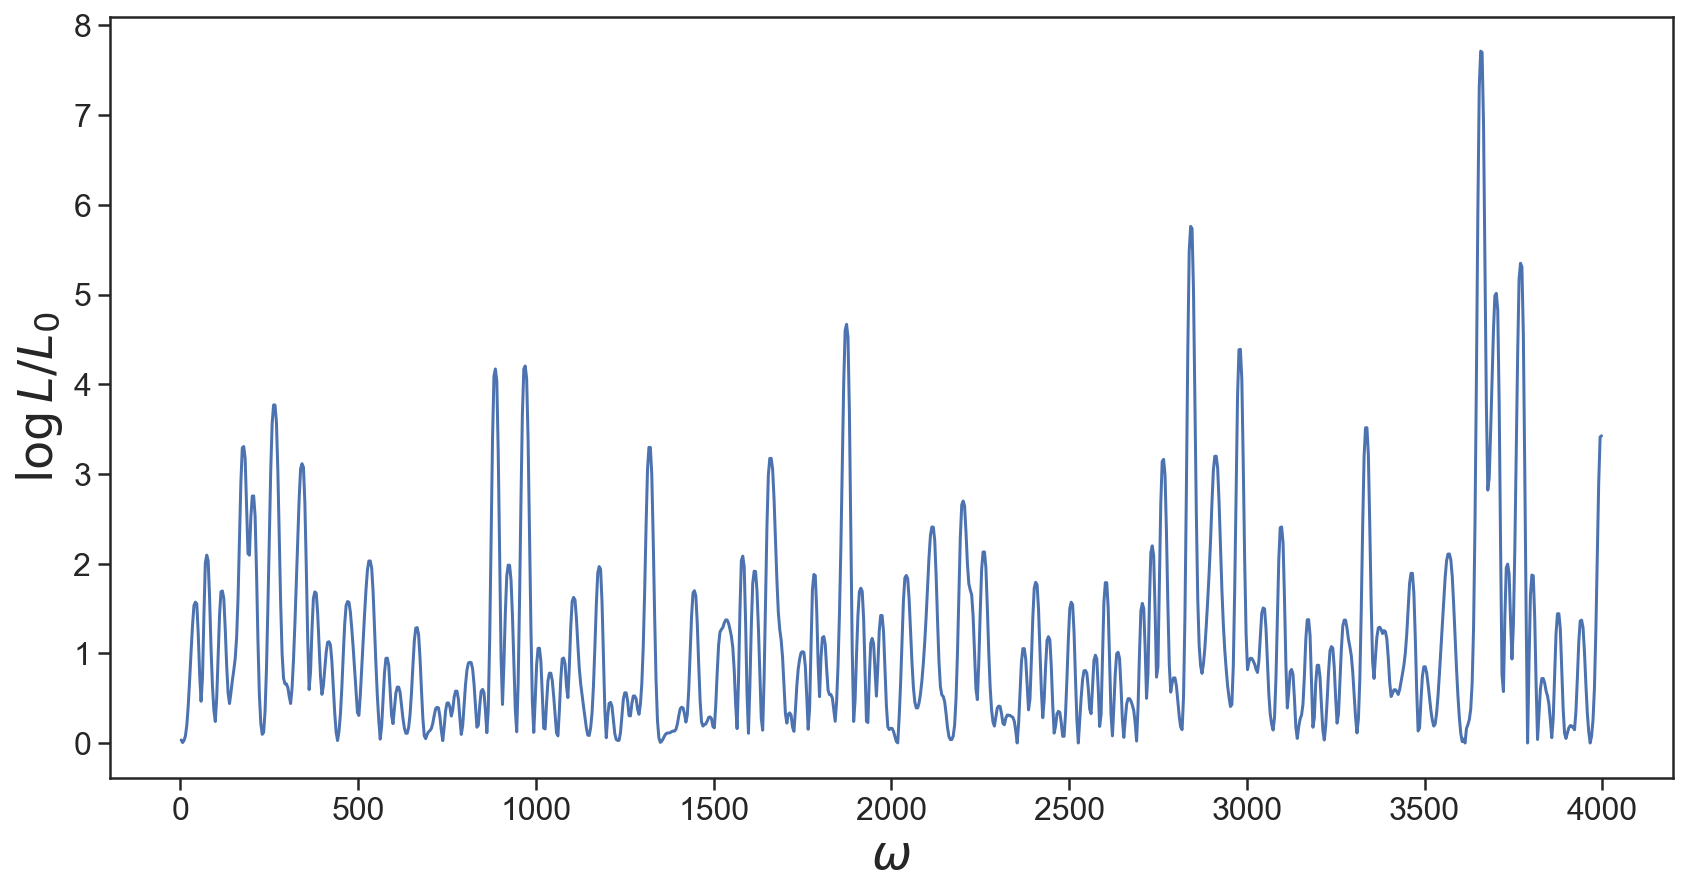

In [4]:
# load the data
# data = dict(np.load('/content/drive/My Drive/P188_288/P188_288_HW7/planck13data.npz'))
data = dict(np.load(localpath+'planck13data.npz'))
omega = data['omega']
logL = data['logL']      # logL evaluated at omega
logL0 = data['logL0']

# compute log L/L0
LL = logL - logL0

# plot the data
plt.figure()
plt.plot(omega, LL)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\log L/L_0$')

Because the search for a signal considers any frequency between 0 and 4,000, the prior volume for the frequency is very large. This leads to the likelihood  being multimodal,  with  many (potentially all) of the peaks corresponding to  noise  fluctuations  rather  than a physical  source. This is the look-elsewhere effect: by considering a large prior volume one invites the possibility of finding many large peaks which are just statistical fluctuations.

We see the maximum likelihood occurs at around $\omega=3660$. Naively, one might compute the root chi-squared at this peak to determine the significance. We will start by doing this.

Approximating peaks as gaussians, the chi-squared is equal to $2 \log L /L_0$. The provided likelihood is discretely sampled over $\omega$, so to estimate the height, width, and location of the peak in frequency space a simple approach is to find the datapoint with maximum likelihood and fit a gaussian through it and adjacent data points. (As mentioned earlier, a more careful analysis would directly optimize and compute the covariance matrix of the likelihood in the space of all 3 parameters $A, \omega, {\rm and } \, \phi$.)

<span style="color:blue"> <i> 1. By applying a gaussian fit, or otherwise, find the location of the maximum, i.e. the best fit $\omega$, the value of $\log L/ L_0$ at the maximum, and the error  $\sigma_\omega$. Print their values.</i></span>

<span style="color:blue"><i>  Next, make a plot of the Gaussian fit and the data around the peak.</i></span>

Hint: Fit the gaussian to the likelihood ratio, not the log likelihood ratio. We have done a similar problem in HW1.5

In [147]:
from scipy.optimize import curve_fit

def gaussian(x, Amp, mu, sig):
    return Amp*np.exp(-((x-mu)**2)/(2*sig**2))

omega_max = omega[np.argmax(LL)]

popt, pcov = curve_fit(gaussian, omega[np.argmax(LL)-2:np.argmax(LL)+3], np.exp(LL[np.argmax(LL)-2:np.argmax(LL)+3]),
                       p0=[2000,3660,1]) # need to give starting values for curve_fit to work properly
LL_max = np.log(gaussian(popt[1], *popt))

print(f'Best fit omega: {popt[1]}, Max logL/L_0: {LL_max}, Error sigma_omega: {popt[2]}')

Best fit omega: 3659.3710133162676, Max logL/L_0: 7.795674449401931, Error sigma_omega: 5.0906418598648


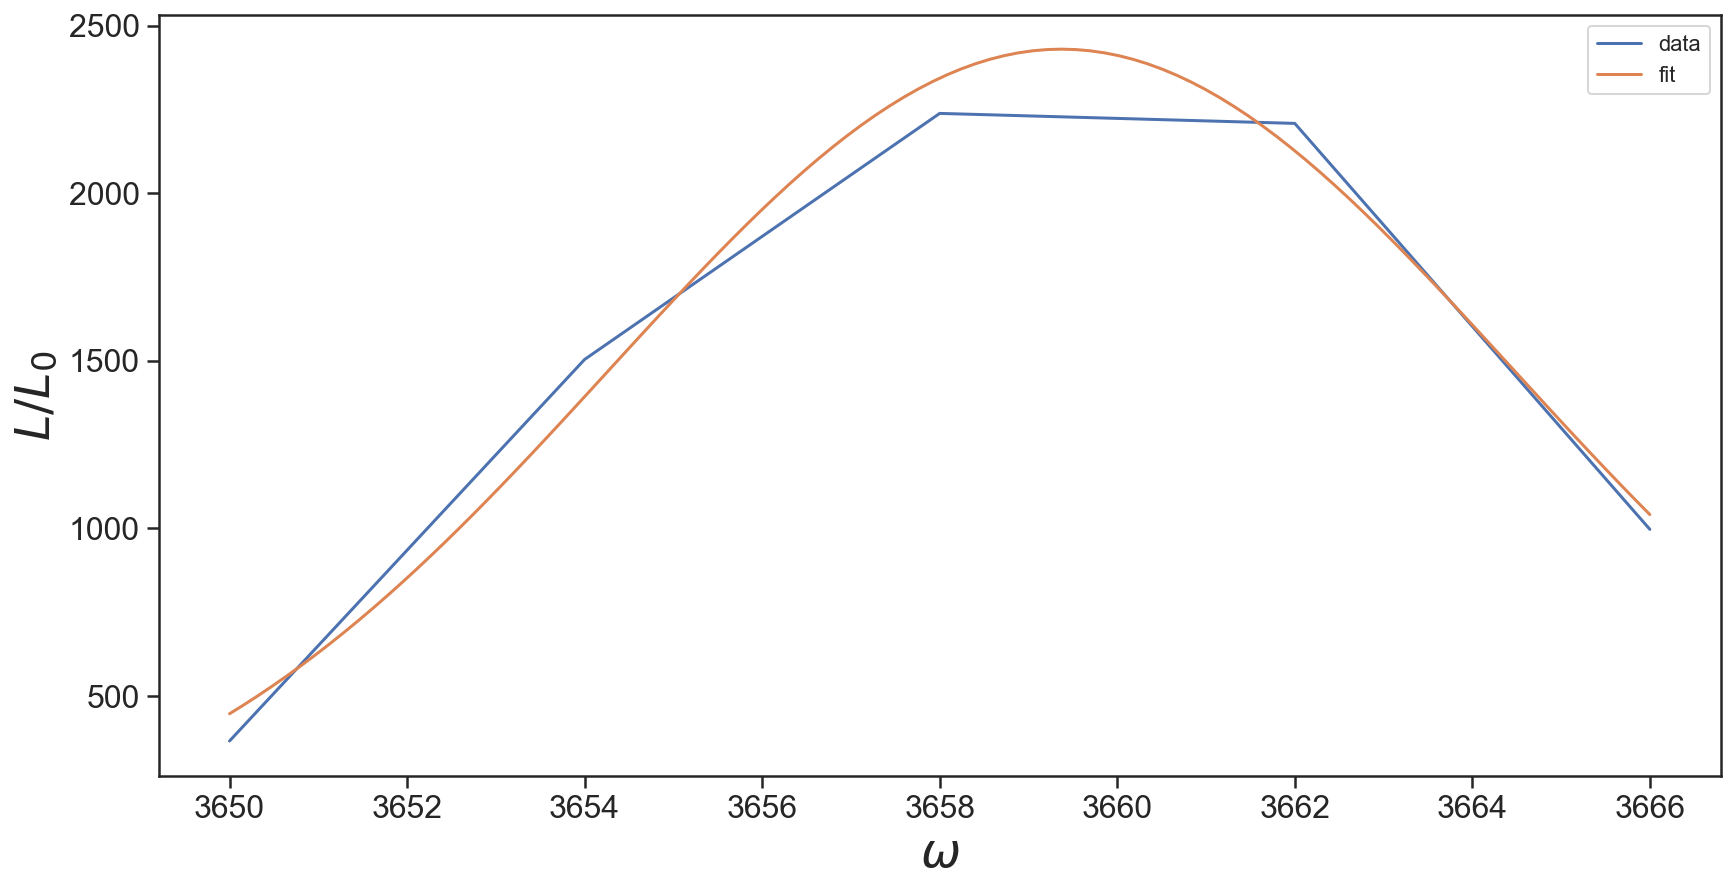

In [189]:
plt.plot(omega[np.argmax(LL)-2:np.argmax(LL)+3], np.exp(LL[np.argmax(LL)-2:np.argmax(LL)+3]), label='data')
omega_list = np.linspace(omega[np.argmax(LL)-2],omega[np.argmax(LL)+2], 100)
plt.plot(omega_list, gaussian(omega_list, *popt), label='fit')
# plt.plot(omega[np.argmax(LL)-2:np.argmax(LL)+3], gaussian(omega[np.argmax(LL)-2:np.argmax(LL)+3], *popt), label='fit')
plt.legend()
plt.xlabel(r'$\omega$')
plt.ylabel(r'$L/L_0$')
plt.show()

<span style="color:blue"> <i> 2. Compute the root chi-squared of the maximum peak, assuming it is a Gaussian. This gives the naive significance of the sigal without considering the look-elsewhere effect. Print its value.
</i></span>

In [190]:
root_chi_sq = np.sqrt(2*np.log(gaussian(popt[1], *popt)))
print('Root chi-squared:', root_chi_sq)

Root chi-squared: 3.9485882159075363


You should find the root chi-squared, to be around 4. This, naively, means that a detection at the level of 4 sigma has been made. While physicists typically set the level to announce a detection at 5 sigma, 4 sigma is still  quite a significant result and would likely attract some media attention. However, the root chi-squared, and more fundamentally the likelihood ratio, does not take into account the look-elsewhere effect. Because a large prior volume introcudes many spurious peaks due to statistical fluctuations, the significance must be penalized. As discussed above, Bayes factor does this for free. 

<span style="color:blue"> <i> 3. Compute Bayes factor and print its value:
</i></span>    
$$ B \equiv \frac{p(x|H)}{p(x|H_0)} \approx \frac{ p(x|\mu,H)}{p(x|H_0)} \frac{V_{\rm posterior}}{V_{\rm prior}},$$
where the prior volume and the posterior volume are defined as $V_{\rm prior} = 1/p(\mu|H)$ and $V_{\rm posterior} = (2 \pi)^{M/2} \sqrt{{\rm det} \Sigma}$.

Note:
The Bayes factor should technically be computed by adding the contributions of all peaks, as the evidence is an integral over parameter space. However, because the maximum likelihood peak here is much higher than the others, it suffices to only consider the contribution to the Bayes factor from the maximum
mode.

Hint:
Use all 3 likelihood parameters, $A, \omega, \phi$. We provide the errors on $A$ and $\phi$ for the maximum peak, as well as the prior volume on the amplitude in the cell below.

In [106]:
# given amplitude and phase information
sigma_A = 0.03901713
Vprior_A = 0.153240657

sigma_phi = 0.46561369
# need to find Vprior_phi, Vprior_omega, Vprior

In [141]:
Vprior_phi = 2*np.pi # uniform prior over range [0,2*pi): p(mu_phi|H) = 1/(2*pi)
Vprior_omega = 4000 # uniform prior over range [0,4000]: p(mu_omega|H) = 1/4000

In [191]:
omega_bf, sigma_omega = popt[1], popt[2]
Vprior = Vprior_A * Vprior_omega * Vprior_phi
B = gaussian(omega_bf, *popt) * (2*np.pi)**(3/2)*np.sqrt(sigma_A**2 * sigma_phi**2 * sigma_omega**2)/Vprior
print('Bayes factor: B =', B)

Bayes factor: B = 0.9190262994464324


You should find the Bayes factor to be a little less than 1. Since the Bayes factor gives the ratio of the evidence for the alternative hypothesis to the null hypothesis, a ratio less than 1 implies that there is more evidence for the null hypothesis compared to the alternative hypothesis. Hence, after accounting for the look-elsewhere effect we find that the signal is actually not worth getting excited about and is very likely a statistical fluctuation.

#### References / Extra Reading 
There are also frequentist approaches to deal with the look-elsewhere effect -- see   [Fergusson et al. (2015)](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.91.123506) for such an analysis for the problem considered above. However, the Bayesian approach provides a more general framework as discussed in [Bayer & Seljak (2020)](https://iopscience.iop.org/article/10.1088/1475-7516/2020/10/009).

***